In [12]:

import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib as pt;
import warnings;
warnings.filterwarnings("ignore")

In [13]:
df= pd.read_csv(r"C:\Users\nandh\Downloads\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

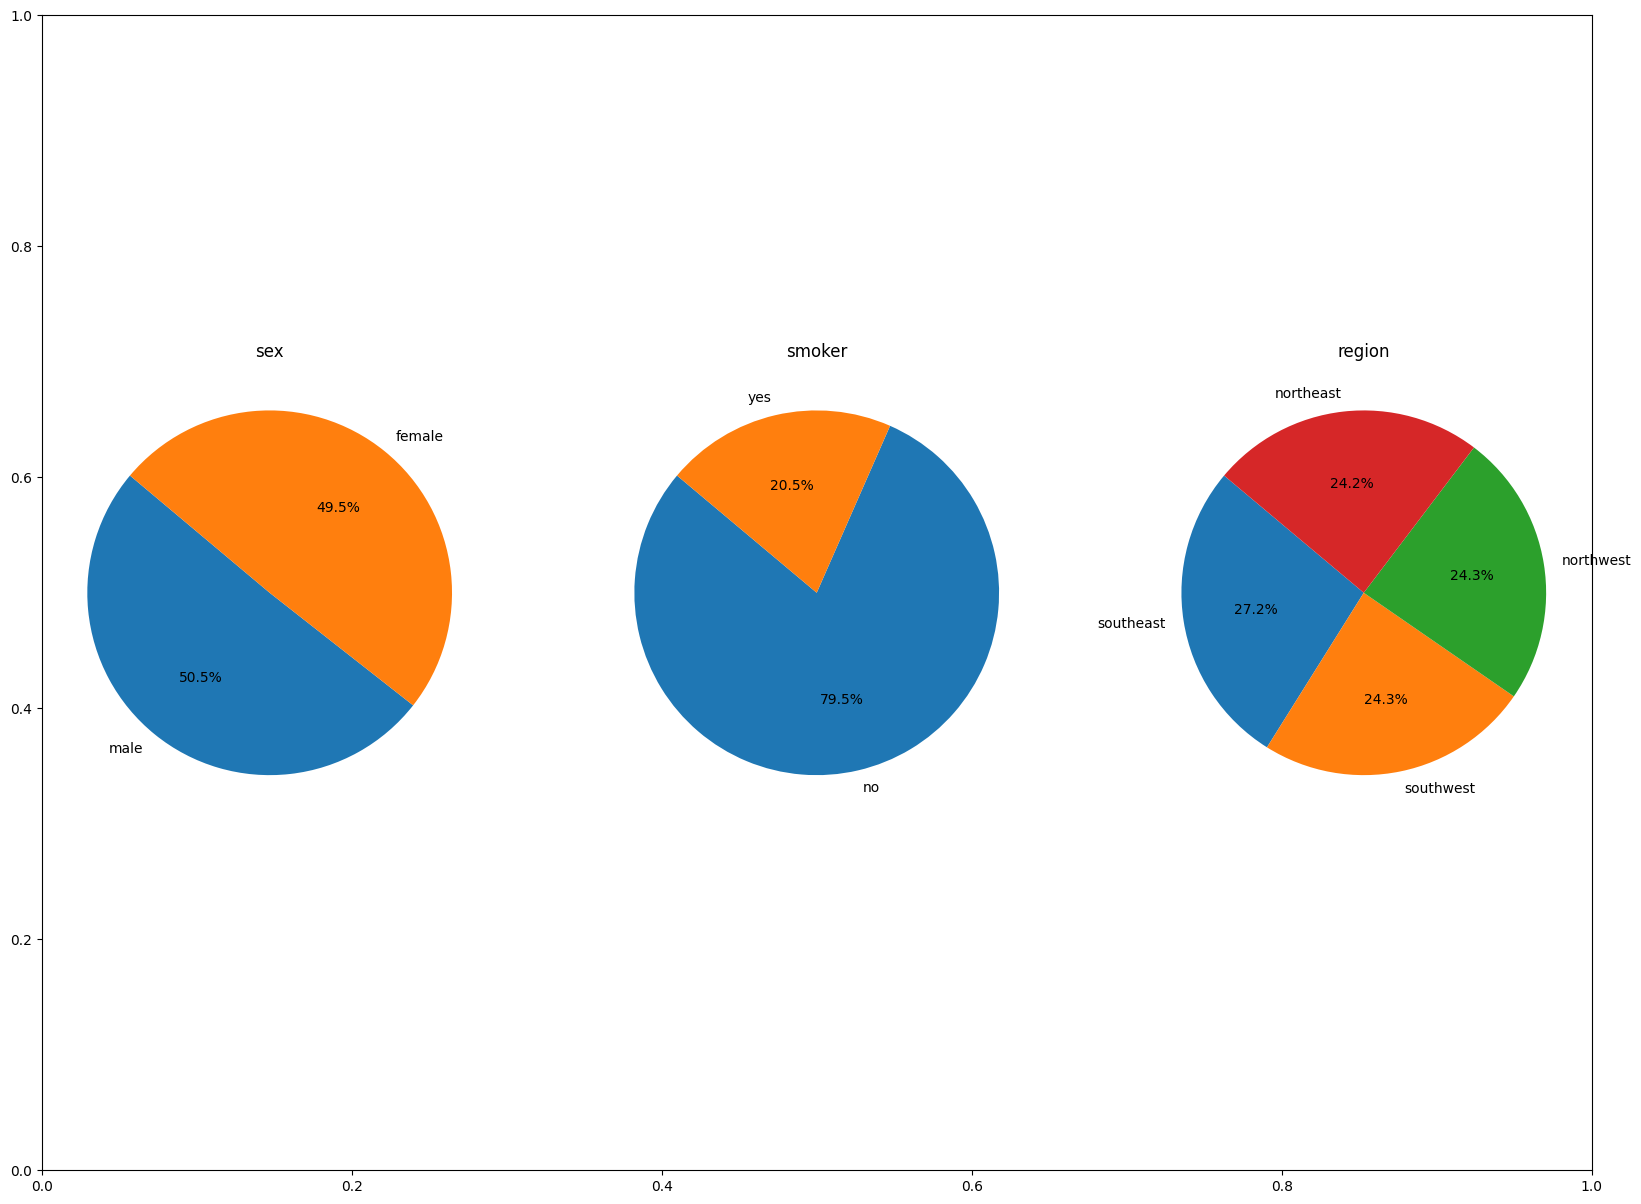

In [18]:
import matplotlib.pyplot as plt
features= ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    x=df[feature].value_counts()
    plt.pie(df[feature].value_counts(), autopct='%1.1f%%', labels=x.index, startangle=140)
    plt.title(feature)

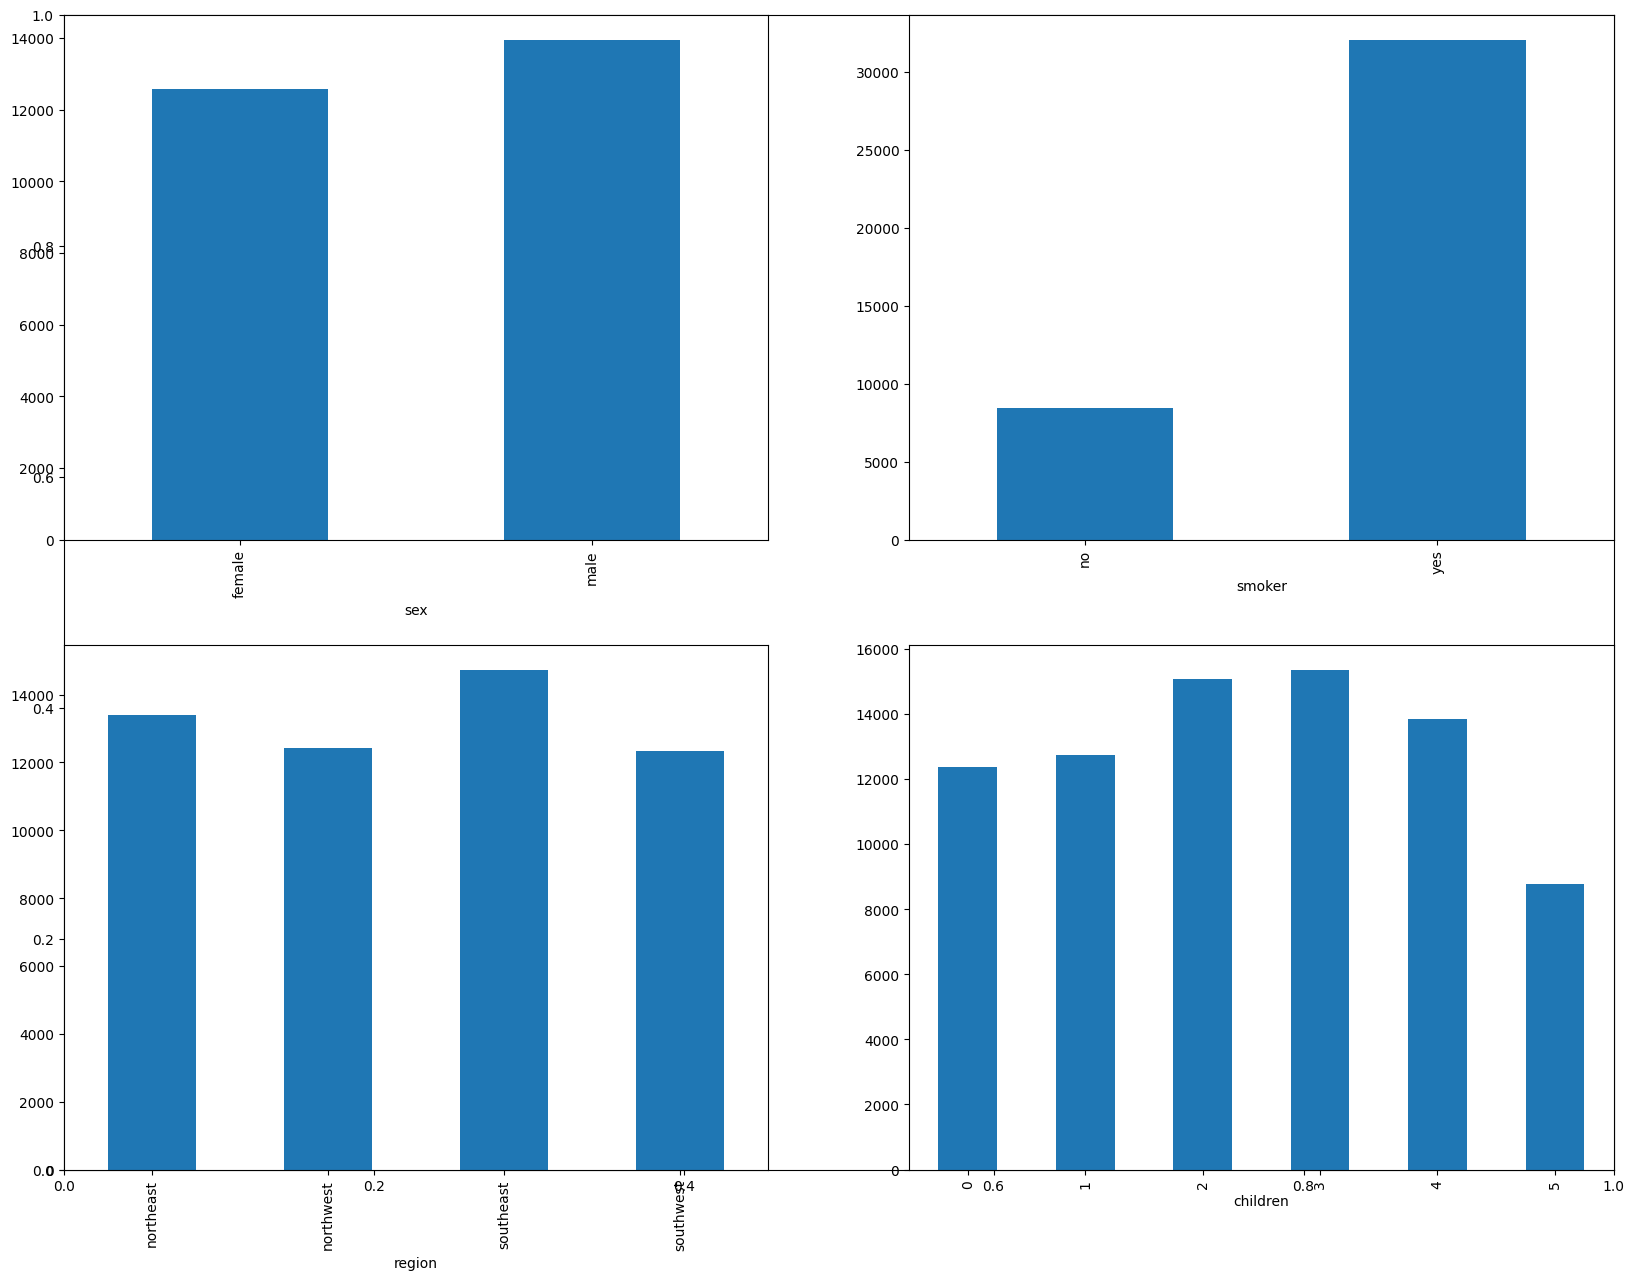

In [19]:
features= ['sex', 'smoker', 'region', 'children']
plt.subplots(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    df.groupby(feature)['charges'].mean().plot(kind='bar')
plt.show()

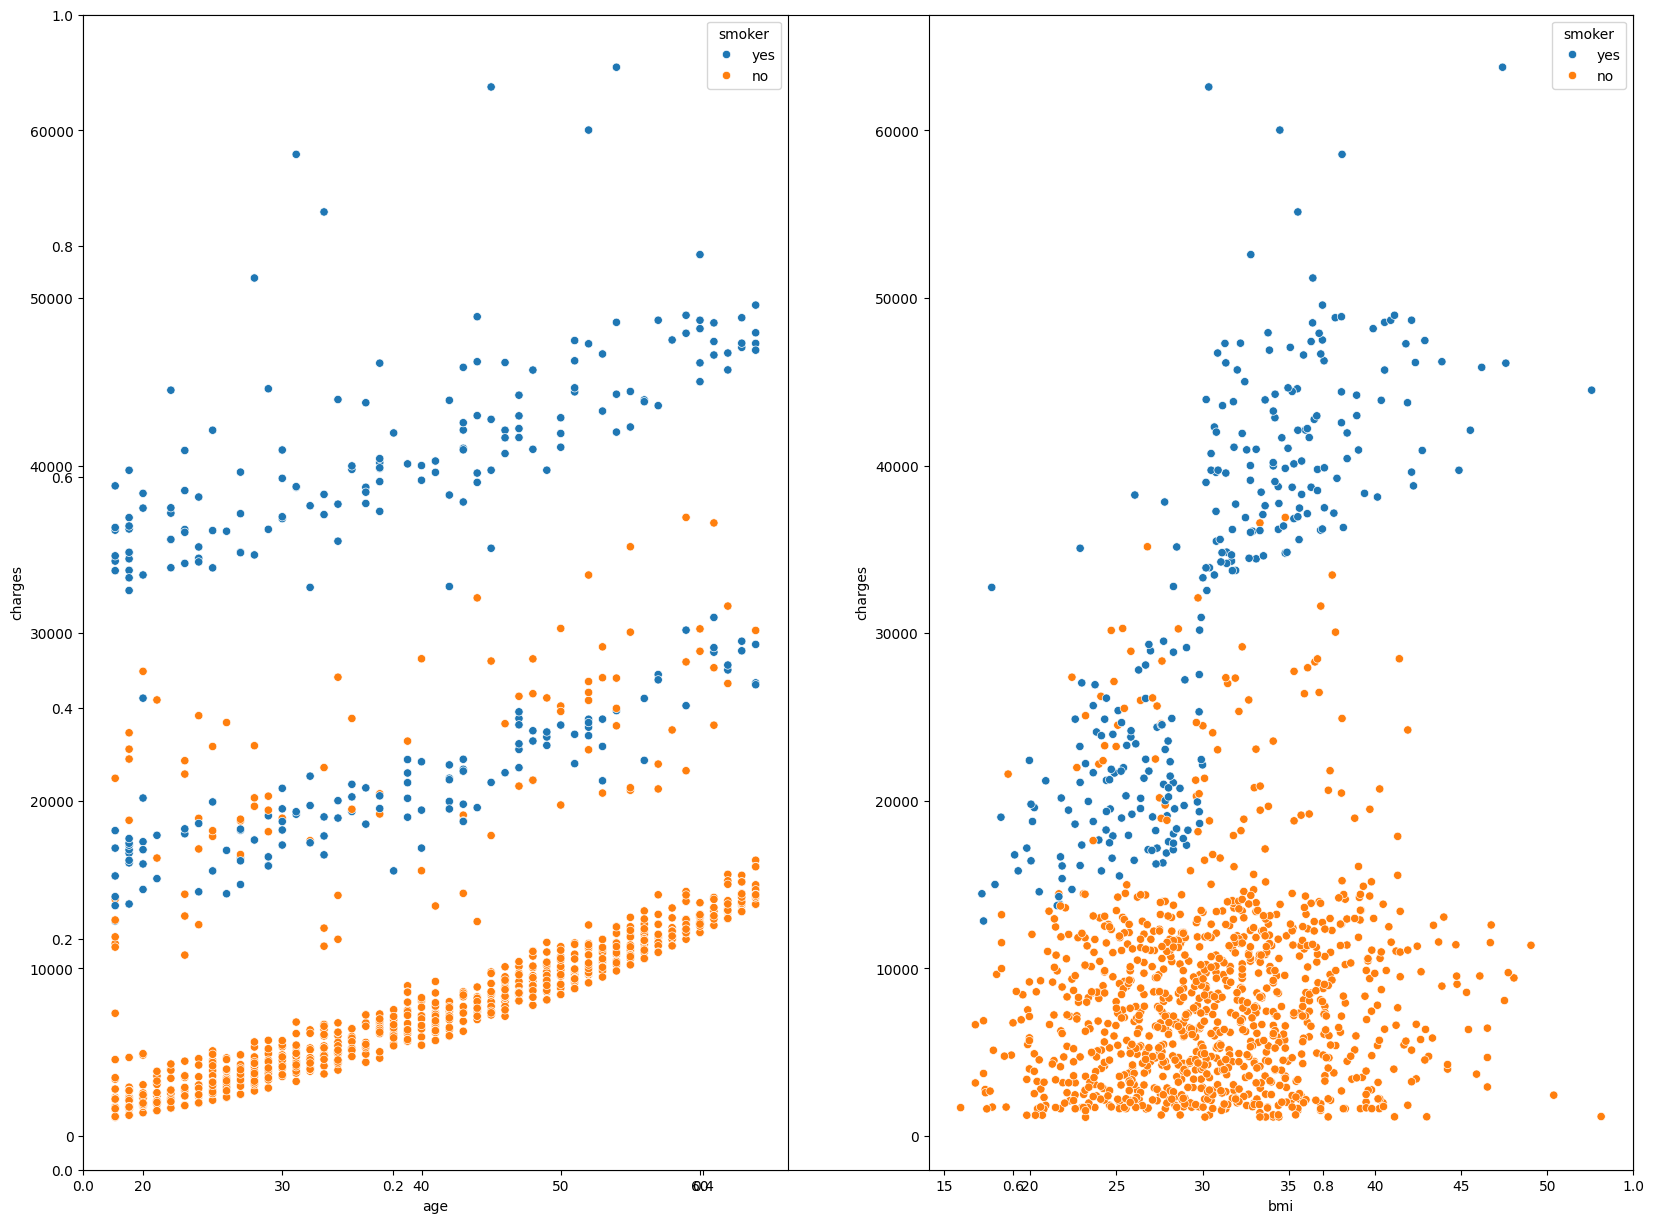

In [21]:
import seaborn as sns
features= ['age', 'bmi']

plt.subplots(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(1, 2, i+1)
    sns.scatterplot(x=feature, y='charges', data=df, hue='smoker')
plt.show()    

<Axes: ylabel='age'>

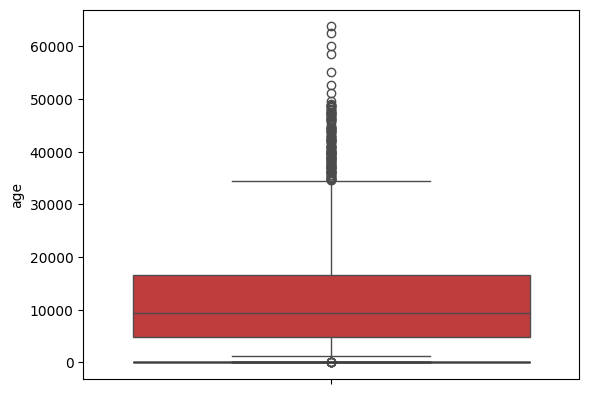

In [ ]:
df.drop_duplicates(inplace=True)
sns.boxplot(df['age'])


<Axes: ylabel='bmi'>

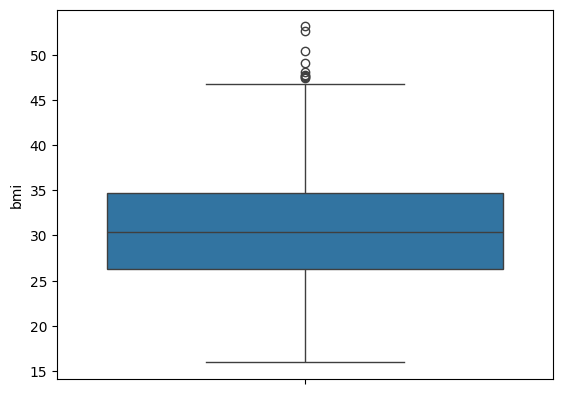

In [24]:
sns.boxplot(df['bmi'])

In [25]:
Q1=df['bmi'].quantile(0.25)
Q3=df['bmi'].quantile(0.75)
Q2=df['bmi'].quantile(0.50)
IQR=Q3-Q1
lower_bound= Q1-1.5*IQR
upper_bound= Q3+1.5*IQR
print("Lower Bound: ", lower_bound)
print("Upper Bound: ", upper_bound)

Lower Bound:  13.674999999999994
Upper Bound:  47.31500000000001


  Obtaining dependency information for feature_engine from https://files.pythonhosted.org/packages/8c/41/c5aa4fef733c48746cce4446a4af7259e47214da1afe51850928df76c45e/feature_engine-1.8.3-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/378.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/378.6 kB ? eta -:--:--
   --- ----------------------------------- 30.7/378.6 kB 660.6 kB/s eta 0:00:01
   ---------------------- ----------------- 215.0/378.6 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 378.6/378.6 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: ylabel='bmi'>

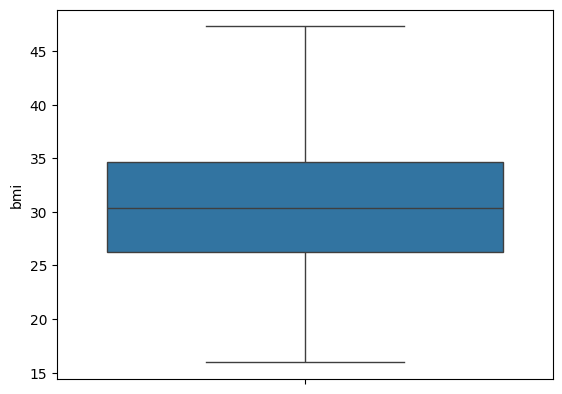

In [28]:
%pip install feature_engine
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi': lower_bound}, max_capping_dict={'bmi': upper_bound})

df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])



In [31]:
df['bmi'].skew()


np.float64(0.23289153320569836)

In [32]:
df['age'].skew()


np.float64(0.054780773126998195)

In [33]:
df['sex']=df['sex'].map({'male': 0, 'female': 1})
df['smoker']=df['smoker'].map({'yes': 1, 'no': 0})
df['region']=df['region'].map({'southwest': 3, 'southeast': 2, 'northwest': 1, 'northeast': 0})

In [35]:
df.corr
print(df.corr())

               age       sex       bmi  children    smoker    region   charges
age       1.000000  0.019814  0.111998  0.041536 -0.025587  0.001626  0.298308
sex       0.019814  1.000000 -0.044831 -0.017848 -0.076596 -0.004936 -0.058044
bmi       0.111998 -0.044831  1.000000  0.013692  0.003151  0.157818  0.199063
children  0.041536 -0.017848  0.013692  1.000000  0.007331  0.016258  0.067389
smoker   -0.025587 -0.076596  0.003151  0.007331  1.000000 -0.002358  0.787234
region    0.001626 -0.004936  0.157818  0.016258 -0.002358  1.000000 -0.006547
charges   0.298308 -0.058044  0.199063  0.067389  0.787234 -0.006547  1.000000


In [38]:
X=df.drop(['charges'], axis=1)
Y=df['charges']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
l1= []
l2= []
l3= []
cvs=0
for i in range(40,50):
  xtrain, xtest, ytrain, ytest= train_test_split(X, Y, test_size=0.2, random_state=i)
  lr= LinearRegression()
  lr.fit(xtrain, ytrain)
  l1.append(lr.score(xtrain, ytrain))
  l2.append(lr.score(xtest, ytest))
  cvs= cross_val_score(lr, X, y, cv=5).mean()
  l3.append(cvs)
  df1=pd.DataFrame({'train acc:': l1, 'test acc' :l2, 'cvs':l3})
  df1

In [ ]:
xtrain, xtest, ytrain, ytest= train_test_split(X, Y, test_size=0.2, random_state=42)
lr= LinearRegression()
lr.fit(xtrain, ytrain)
print(lr.score(xtrain, ytrain))
print(lr.score(xtest, ytest))
print(cross_val_score(lr, X, Y, cv=5).mean())

0.7298127441752071
0.8069852180198291
0.7472330007362453


In [41]:
from sklearn.metrics import r2_score
svrmodel= SVR()
svrmodel.fit(xtrain, ytrain)
ypredtrain1=svrmodel.predict(xtrain)
ypredtest1=svrmodel.predict(xtest)
print(r2_score(ytrain, ypredtrain1))
print(r2_score(ytest, ypredtest1))
print(cross_val_score(svrmodel, X, Y, cv=5).mean())


-0.10151510595916013
-0.13444619271992142
-0.10374544711248328


In [43]:
rfmodel= RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain, ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain, ypredtrain2))
print(r2_score(ytest, ypredtest2))
print(cross_val_score(rfmodel, X, Y, cv=5).mean())

from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10, 40, 50, 98, 100, 120, 150],}
grid=GridSearchCV(estimator, param_grid, cv=5, scoring='r2')
grid.fit(xtrain, ytrain)
print(grid.best_params_)
rfmodel= RandomForestRegressor(n_estimators=120, random_state=42)
rfmodel.fit(xtrain, ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain, ypredtrain2))
print(r2_score(ytest, ypredtest2))
print(cross_val_score(rfmodel, X, Y, cv=5).mean())


0.9735904220440784
0.8834632830563434
0.8351942496087261
{'n_estimators': 150}
0.9745247975234683
0.8834138611344691
0.8359766930798754


In [45]:
gbmodel= GradientBoostingRegressor(random_state=42)
gbmodel.fit(xtrain, ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print(r2_score(ytrain, ypredtrain3))
print(r2_score(ytest, ypredtest3))
print(cross_val_score(gbmodel, X, Y, cv=5).mean())
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10, 15, 19, 20, 21, 50], 'learning_rate':[0.01, 0.19, 0.2, 0.21, 0.8, 1]}
grid=GridSearchCV(estimator, param_grid, cv=5, scoring='r2')
grid.fit(xtrain, ytrain)
print(grid.best_params_)
gbmodel= GradientBoostingRegressor(n_estimators=20, learning_rate=0.2, random_state=42)
gbmodel.fit(xtrain, ytrain)
ypredtrain3=gbmodel.predict(xtrain)
ypredtest3=gbmodel.predict(xtest)
print(r2_score(ytrain, ypredtrain3))
print(r2_score(ytest, ypredtest3))
print(cross_val_score(gbmodel, X, Y, cv=5).mean())
print(cross_val_score(gbmodel, X, Y, cv=5).mean())


0.8943206659773493
0.9026914135834231
0.8554311500122462
{'learning_rate': 0.19, 'n_estimators': 19}
0.8694653703548502
0.902278638133392
0.8606726296902341
0.8606726296902341


In [46]:
xgmodel= XGBRegressor()
xgmodel.fit(xtrain, ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain, ypredtrain4))
print(r2_score(ytest, ypredtest4))
print(cross_val_score(xgmodel, X, Y, cv=5).mean())
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10, 15, 20, 40, 50],'max_depth':[3, 4, 5, 6], 'gamma':[0,0.15,0.3,0.5,1]}
xgmodel=XGBRegressor(n_estimators=15, max_depth=3, gamma=0)
xgmodel.fit(xtrain, ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain, ypredtrain4))
print(r2_score(ytest, ypredtest4))
print(cross_val_score(xgmodel, X, Y, cv=5).mean())

0.9947324715250472
0.8604747275960606
0.8026584021052837
0.8691019035255965
0.9021274972897988
0.8610766072878195


In [ ]:

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame(data=grid.best_estimator_.feature_importances_, index=X.columns, columns=['Importance'])
    

# Display the feature importance
print(feature_importance_df)




          Importance
age         0.121107
sex         0.000190
bmi         0.175501
children    0.011003
smoker      0.690902
region      0.001296


In [53]:
important_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]
important_features

,Importance
age,0.121107
bmi,0.175501
children,0.011003
smoker,0.690902


In [55]:
df.drop(df[['sex', 'region']], axis=1, inplace=True)
Xf= df.drop(['charges'], axis=1)
X= df.drop(['charges'], axis=1)
xtrain, xtest, ytrain, ytest= train_test_split(Xf, Y, test_size=0.2, random_state=42)
finalmodel=XGBRegressor(n_estimators=15, max_depth=3, gamma=0)
finalmodel.fit(xtrain, ytrain)
ypredtrain=finalmodel.predict(xtrain)
ypredtest=finalmodel.predict(xtest)
print(r2_score(ytrain, ypredtrain))
print(r2_score(ytest, ypredtest))
print(cross_val_score(finalmodel, X, Y, cv=5).mean())



0.869105118970057
0.9007425513499979
0.8606266871712276


In [ ]:
from pickle import dump
dump(finalmodel, open('insurance_model.pkl', 'wb'))

In [61]:
new_data = pd.DataFrame({'age': [25], 'sex': ['male'], 'bmi': [30.0], 'children': [0], 'smoker': ['yes'], 'region': ['northeast']})
new_data['smoker'] = new_data['smoker'].map({'yes': 1, 'no': 0})
new_data = new_data.drop(['sex', 'region'], axis=1)
finalmodel.predict(new_data)

array([21062.71], dtype=float32)